In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
#titanic = pd.read_csv('./Titanic.csv')
titanic = pd.read_csv(r'C:\Users\sheba\Desktop\Stevens_semester1\applied ML\week3\Titanic.csv')

# Display the first few rows of the dataframe
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Step 1

In [2]:
def QuantileBinning(feature, bin_number):
    """
    This function takes a numerical feature and the number of bins, and
    returns the feature binned into quantile-based bins.

    Parameters:
    - feature (pandas.Series): The numerical feature to be binned.
    - bin_number (int): The number of quantile bins.

    Returns:
    - pandas.Series: A series of discrete features binned by quantile.
    """
    # Use qcut to create quantile-based bins for the feature
    # If there are fewer unique values than bins, qcut could throw an error.
    # 'duplicates' parameter handles this by dropping redundant bins.
    return pd.qcut(feature, q=bin_number, labels=False, duplicates='drop')

# One example
feature_test = pd.DataFrame(np.random.rand(100),  columns=['Column_A'])
feature_test_discrete = QuantileBinning(feature_test['Column_A'], 10)

def label_encoder(feature):
    unique_labels = pd.unique(feature)
    label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
    transformed_feature = np.array([label_to_int[label] for label in feature])
    return transformed_feature

In [3]:
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [155]:
print(titanic.dtypes)

Unnamed: 0      int64
pclass         object
survived        int64
name           object
sex            object
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
dtype: object


In [156]:
missing_values = titanic.isnull().sum()
missing_values

Unnamed: 0       0
pclass           0
survived         0
name             0
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             1
cabin         1014
embarked         2
boat           823
body          1188
home.dest      564
dtype: int64

Step 1: Data Preparation
Load the Titanic.csv file and examine a sample of the data. Notice that the dataset contains both
categorical and numerical features.
1. Address any missing values by imputing them with the feature's mean across the dataset.
2. For this assignment, select a subset of the data including the independent variables: 'pclass', 'sex',
'age', and 'sibsp', and the dependent variable 'survived'.
3. Ensure that 'survived' is a binary variable coded as 1 (yes) or 0 (no).
4. Split the data into training and test sets, using an 80/20 split

In [9]:
from sklearn.model_selection import train_test_split

# Fill missing values in 'age' with the average age

titanic['age'] = titanic['age'].fillna(titanic['age'].mean()) #imputing missing value
df=titanic.loc[:,['pclass','sibsp','sex','age','survived']] #choosing the subset of the data

df["survived"] = df["survived"].astype("category") #This is a classification task and target should be categorical column


Step 2: Data Processing and Initial Analysis
1. Recognize that the 'age' attribute is continuous. As discussed in our class, decision trees are
typically applied to categorical features. Utilize the steps outlined in the provided Jupyter
notebook to discretize 'age' using quantile binning.
2. Compute the information gain to determine the optimal first split in the decision tree

In [10]:
# Discretization, I used the function and change the numric feature in a binning format which is more convineint for Decision Tree
df["age_discrete"] = QuantileBinning(df['age'], 5)
df["sibsp_discrete"] = QuantileBinning(df['sibsp'], 5)

#For catergorical data, I encode them for to be in correct format for decison tree model.Becuase the model can not handle string values. 
df["pclass"] = df["pclass"].astype("category")
df['pclass_encode']=label_encoder(df['pclass'])
df['sex_encode']=label_encoder(df['sex'])




In [6]:
df

,pclass,sibsp,sex,age,survived,age_discrete,sibsp_discrete,pclass_encode,sex_encode
0,1st,0,female,29.000000,1,2,0,0,0
1,1st,1,male,0.916700,1,0,0,0,1
2,1st,1,female,2.000000,0,0,0,0,0
3,1st,1,male,30.000000,0,3,0,0,1
4,1st,1,female,25.000000,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1304,3rd,1,female,14.500000,0,0,0,2,0
1305,3rd,1,female,29.881135,0,2,0,2,0
1306,3rd,0,male,26.500000,0,1,0,2,1
1307,3rd,0,male,27.000000,0,1,0,2,1


In [11]:
# define your entropy function and information gain function

def entropy_function(class_labels) :
    total_class=len(class_labels)
    label_counts = class_labels.value_counts()
    probs = label_counts / total_class
        
    entropy=-np.sum([p * np.log2(p) for p in probs if p > 0])

    
    return entropy

# Calculate Information Gain for each feature in the training set

def information_gain(S,feature):
    
    entropy_S=entropy_function(S)
    
    unique_vals = feature.unique()

        
    unique_vals = feature.unique()

    # Creating subsets based on the unique values
    subsets = [S[feature == val] for val in unique_vals]

    # Calculating the total number of instances in all subsets
    total_len =len(S)

    # Calculating the weighted entropy of the subsets
    weighted_entropy = sum((len(subset) / total_len) * entropy_function(subset) for subset in subsets)
    

    gain=entropy_S-weighted_entropy
    
    return gain
    

In [173]:
entropy_S=entropy_function(df['survived'])
entropy_S

0.959422170862815

In [12]:

info_gain_pclass=information_gain(df['survived'],df['pclass'])
info_gain_sex=information_gain(df['survived'],df['sex'])
info_gain_age=information_gain(df['survived'],df['age'])
info_gain_sibsp=information_gain(df['survived'],df['sibsp'])

info_gain_sex

0.2055048727200759

So the first split should be "sex"

In [6]:
info_gains

{'pclass': 0.07175330504636224,
 'sex': 0.2319449106625785,
 'age': 0.02055919966242481,
 'sibsp': 0.029840807548709658}

In [13]:
df.drop(columns=['age'], inplace=True)  # Remove the age column
df.drop(columns=['sibsp'], inplace=True)  # Remove the sibsp column
df.drop(columns=['sex'], inplace=True)  # Remove the sex column
df.drop(columns=['pclass'], inplace=True)  # Remove the pclass column

In [14]:
# Splitting the data into 80% training and 20% test sets
X = df.drop(labels=['survived'], axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True)

# Step 3
Employ sklearn to train a decision tree model, setting the maximum number of leaf nodes to 20
and the random_state to your student id number. (Please apply it to all the rest questions)

2. Visualize the complete tree. Note that your tree's structure and size may vary from the example.

3. Implement a function to calculate the accuracy, precision, recall, and F1 score on the test set

[Text(0.4642857142857143, 0.9444444444444444, 'sex_encode <= 0.5\nentropy = 0.968\nsamples = 1047\nvalue = [634, 413]'),
 Text(0.23809523809523808, 0.8333333333333334, 'pclass_encode <= 1.5\nentropy = 0.838\nsamples = 385\nvalue = [103, 282]'),
 Text(0.09523809523809523, 0.7222222222222222, 'pclass_encode <= 0.5\nentropy = 0.342\nsamples = 204\nvalue = [13, 191]'),
 Text(0.047619047619047616, 0.6111111111111112, 'entropy = 0.244\nsamples = 124\nvalue = [5, 119]'),
 Text(0.14285714285714285, 0.6111111111111112, 'sibsp_discrete <= 0.5\nentropy = 0.469\nsamples = 80\nvalue = [8, 72]'),
 Text(0.09523809523809523, 0.5, 'age_discrete <= 0.5\nentropy = 0.49\nsamples = 75\nvalue = [8, 67]'),
 Text(0.047619047619047616, 0.3888888888888889, 'entropy = 0.297\nsamples = 19\nvalue = [1, 18]'),
 Text(0.14285714285714285, 0.3888888888888889, 'entropy = 0.544\nsamples = 56\nvalue = [7, 49]'),
 Text(0.19047619047619047, 0.5, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.38095238095238093, 0.72

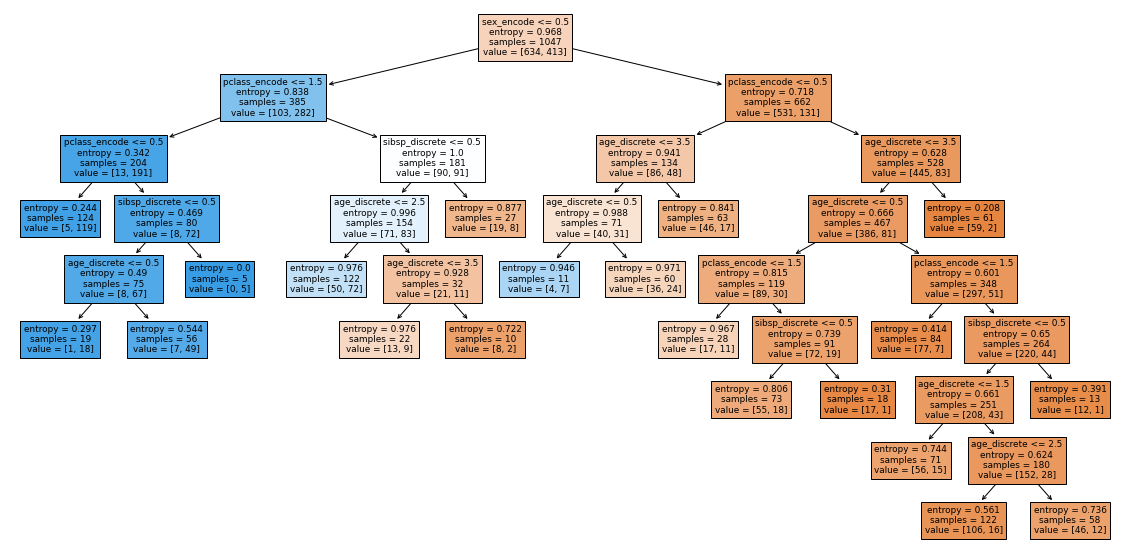

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20, 10))


# Instantiate the DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=20, random_state=20028548 )
dtree = dtree.fit(X_train, y_train) #trainging the model

plot_tree(dtree, feature_names=X.columns, filled=True) #ploting the tree



In [16]:
from sklearn.metrics import classification_report

y_pred = dtree.predict(X_test) #Prediciting the target


In [17]:
# Defining the performance metrics including accuracy, precision, recall and F1-scorre
target_names = ['not survived', 'survived']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

not survived       0.82      0.89      0.85       175
    survived       0.73      0.62      0.67        87

    accuracy                           0.80       262
   macro avg       0.78      0.75      0.76       262
weighted avg       0.79      0.80      0.79       262



# Step 4

Step 4: Model Optimization
1. Apply GridSearchCV() to identify the optimal max_leaf_nodes parameter, exploring values from
5 to 20, for tree pruning.
2. Plot the pruned tree, which should be more compact than the initially generated tree. Report the
performance. (using metrics in step 3.3, same below for step 5

[Text(0.3333333333333333, 0.9166666666666666, 'sex_encode <= 0.5\ngini = 0.478\nsamples = 1047\nvalue = [634, 413]'),
 Text(0.1111111111111111, 0.75, 'pclass_encode <= 1.5\ngini = 0.392\nsamples = 385\nvalue = [103, 282]'),
 Text(0.05555555555555555, 0.5833333333333334, 'gini = 0.119\nsamples = 204\nvalue = [13, 191]'),
 Text(0.16666666666666666, 0.5833333333333334, 'sibsp_discrete <= 0.5\ngini = 0.5\nsamples = 181\nvalue = [90, 91]'),
 Text(0.1111111111111111, 0.4166666666666667, 'age_discrete <= 2.5\ngini = 0.497\nsamples = 154\nvalue = [71, 83]'),
 Text(0.05555555555555555, 0.25, 'gini = 0.484\nsamples = 122\nvalue = [50, 72]'),
 Text(0.16666666666666666, 0.25, 'age_discrete <= 3.5\ngini = 0.451\nsamples = 32\nvalue = [21, 11]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.2222222222222222, 0.4166666666666667, 'gini = 0.417\nsamples 

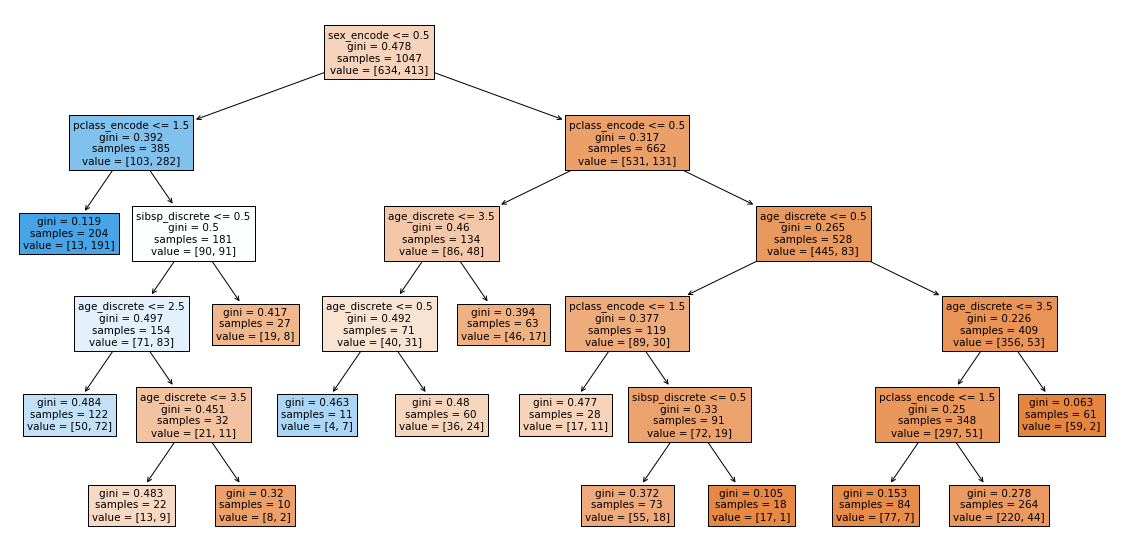

In [23]:
from sklearn.model_selection import GridSearchCV
plt.figure(figsize=(20, 10)) 

# Defining a range of max_leaf_nodes values to find the optimal value
param_grid = {'max_leaf_nodes': list(range(5, 20))}

# Running the grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=20028548), param_grid, cv=5)
grid_search_tree=grid_search.fit(X_train, y_train) 

#The best estimator with the optimal max_leaf_nodes parameter
best_params=grid_search_tree.best_params_


# Plotting the pruned decision tree
optimal_tree_object = DecisionTreeClassifier(max_leaf_nodes=best_params['max_leaf_nodes'], random_state=20028548)

best_tree = optimal_tree_object.fit(X_train, y_train)

plot_tree(best_tree, feature_names=X.columns, filled=True)

# Step 5


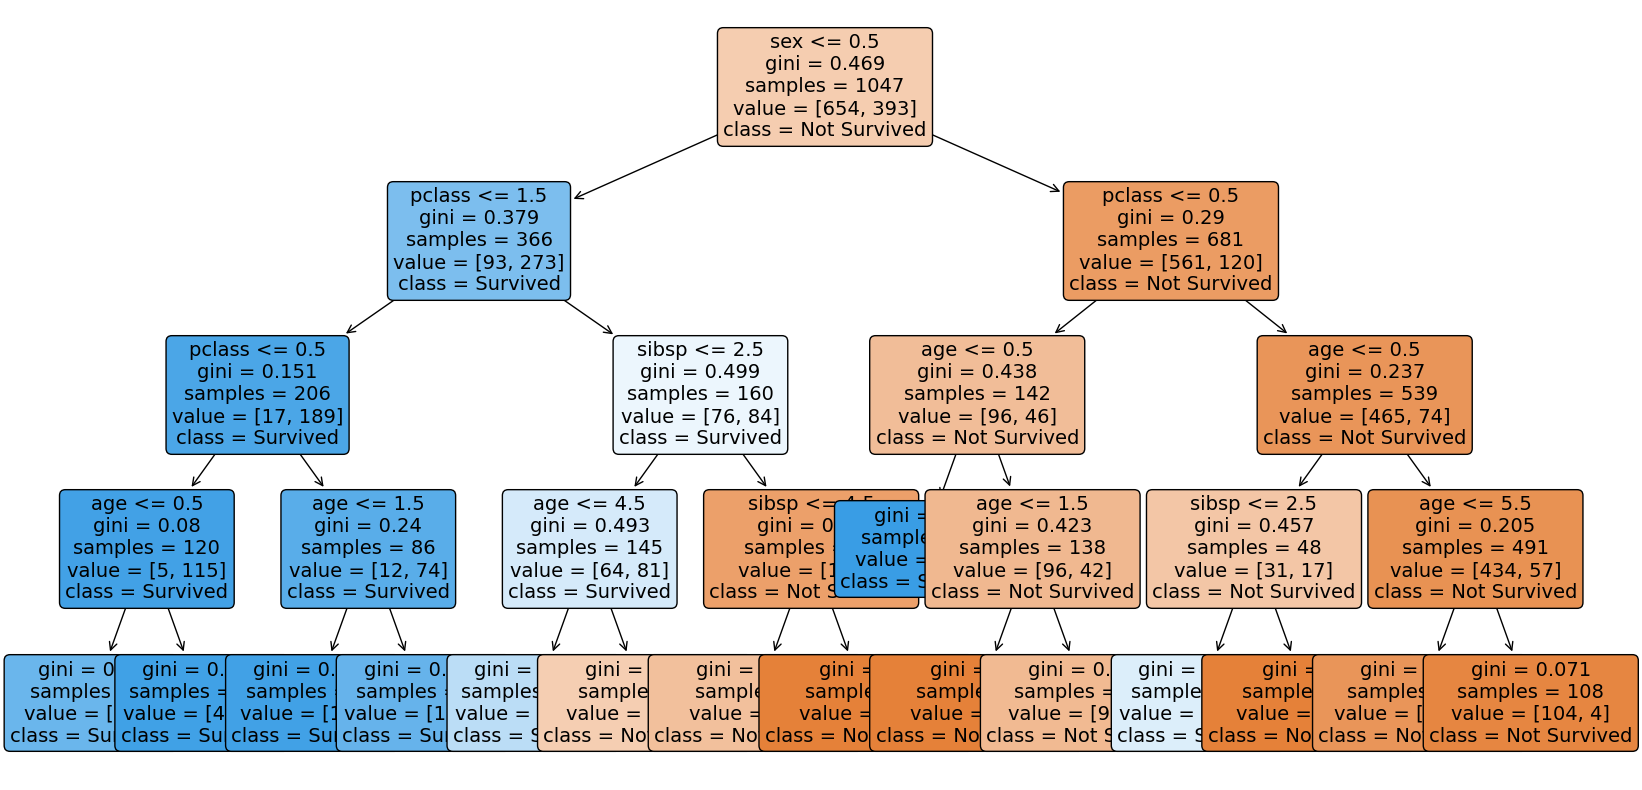

In [10]:
## it's an example (max_depth)

# Step 5

1.Replicate Steps 3 and 4 to construct two additional decision tree models with varying parameters,

such as the maximum depth and splitting criteria.

2. Use majority vote to create an ensemble learning model that combines the three decision trees
model we trained in the step 4 and step 5.1.

3. Use the RandomFOrestClassifier() function to train a random forest using the optimal tree size
you found in step 4. You can set n_estimator as 50. Compare the performance of your random
forest and your ensembled model.


In [21]:
from sklearn.model_selection import GridSearchCV
plt.figure(figsize=(20, 10)) 

# Defining the criterion values to find the best one.
param_grid = {'criterion': ['gini', 'entropy']}

# Running grid search with cross-validation
dt = GridSearchCV(DecisionTreeClassifier(random_state=20028548), param_grid, cv=5)
dt_opt_critia=dt.fit(X_train, y_train) # Note testing set cannot be used

# Getting the best estimator with the optimal criterion
dt_opt_critia_best = dt_opt_critia.best_estimator_




<Figure size 1440x720 with 0 Axes>

In [24]:
def ensemble_vote(models, X):

    # Perform majority vote
    
    predictions = np.array([model.predict(X) for model in models])
        
    
    # Perform majority vote 
    # For each sample, count the votes for each class (0 or 1)
    
    # Determine the winning class for each sample: it's the one with the most votes
    # If there's a tie, we choose the class with the highest index (1 in this case)

    ensemble_predictions=[]
    
    for j in range(predictions.shape[1]):
        
        class_0_votes = np.sum(predictions[:, j] == 0)  
        class_1_votes = np.sum(predictions[:, j] == 1) 

        if class_1_votes > class_0_votes: #When the class 1 has more votes
        
            final_prediction = 1
            ensemble_predictions.append(final_prediction)
            
        elif class_1_votes < class_0_votes :
        
            final_prediction = 0
            ensemble_predictions.append(final_prediction)
        else :
            final_prediction=1 #if it is a tie, I choose the class 1
            ensemble_predictions.append(final_prediction)


    return np.array(ensemble_predictions) # predition of the majority votes for all samples

    
optimal_tree_object = DecisionTreeClassifier(max_leaf_nodes=best_params['max_leaf_nodes'], random_state=20028548)
best_tree = optimal_tree_object.fit(X_train, y_train) #training the the optimal model with  the optimal max_leaf_node


dtree_2 = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=20, random_state=20028548 )
dt_max_depth = dtree_2.fit(X_train, y_train) #training the model with maximum leaf nodes.



param_grid = {'criterion': ['gini', 'entropy']}
dt = GridSearchCV(DecisionTreeClassifier(random_state=20028548), param_grid, cv=5)
dt_opt_critia=dt.fit(X_train, y_train)

    
# Use the defined function to get predictions from the ensemble of the three trees

models=[best_tree,dt_max_depth,dt_opt_critia]
ensemble_predictions = ensemble_vote(models, X_test)



# Calculate performance metrics for the ensemble using the previously defined function
# Define your performance metrics including accuracy, precision, recall and F1-scorre

target_names = ['not survived', 'survived']

print(classification_report(y_test, ensemble_predictions, target_names=target_names))

              precision    recall  f1-score   support

not survived       0.82      0.89      0.85       175
    survived       0.73      0.62      0.67        87

    accuracy                           0.80       262
   macro avg       0.78      0.75      0.76       262
weighted avg       0.79      0.80      0.79       262



{'Precision': {0.7047619047619048},
 'Recall': {0.6915887850467289},
 'F1 Score': {0.6981132075471698}}


Train a random forest model using the optimal tree you found in step 4 and compare the ensembled model with the random forest 

In [25]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50, random_state=20028548, max_leaf_nodes=8, oob_score=True)

# Fit the regressor with x and y data
classifier.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=8, n_estimators=50, oob_score=True,
                       random_state=20028548)

In [26]:
predictions = classifier.predict(X_test)


In [27]:
target_names = ['not survived', 'survived']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

not survived       0.82      0.89      0.85       175
    survived       0.73      0.62      0.67        87

    accuracy                           0.80       262
   macro avg       0.78      0.75      0.76       262
weighted avg       0.79      0.80      0.79       262



Based on the results, the  Recall and f1-score in ensemble learning is higher that random forest.I concluded that when I used multiple models in ensemble model, the overall acuuracy is higher. Because in my ensemble model, I used models with different hyperparamentes that can capture more pattern in the data and lead to the generalization on unseen data. However, in the Random forest, the model train by the method of booststrapping and the models train on different subset of data that some fo them may not perform well on that subset which lead to the overal low performance.